Processing image  0
0 77.0982907921985 94.75096

Processing image  1
1 64.36130181012507 75.3976875

Processing image  2
2 66.63116613895853 81.28899791666667

Processing image  3
3 72.14657824562612 97.15735625

Processing image  4
4 65.15622328449864 80.62706875

Processing image  5
5 55.41895945527128 65.94160052083333

Processing image  6
6 54.111767586795224 61.5242875

Processing image  7
7 63.637855970537466 74.44051458333334

Processing image  8
8 64.4220945214037 80.3533890625

Processing image  9
9 69.5715684363535 84.31192395833334

Processing image  10
10 67.8992176291893 83.41339427083334

Processing image  11
11 58.35551331069696 67.14935833333334

Processing image  12
12 65.16781139363967 77.983390625

Processing image  13
[[171 173 172]
 [171 173 172]
 [171 173 172]
 ...
 [148 150 149]
 [148 150 149]
 [148 150 149]]
13 23.22189192100154 167.14411614583332

Processing image  14
[[170 172 171]
 [170 172 171]
 [170 172 171]
 ...
 [144 148 147]
 [143 147 146]
 [143 147 146]

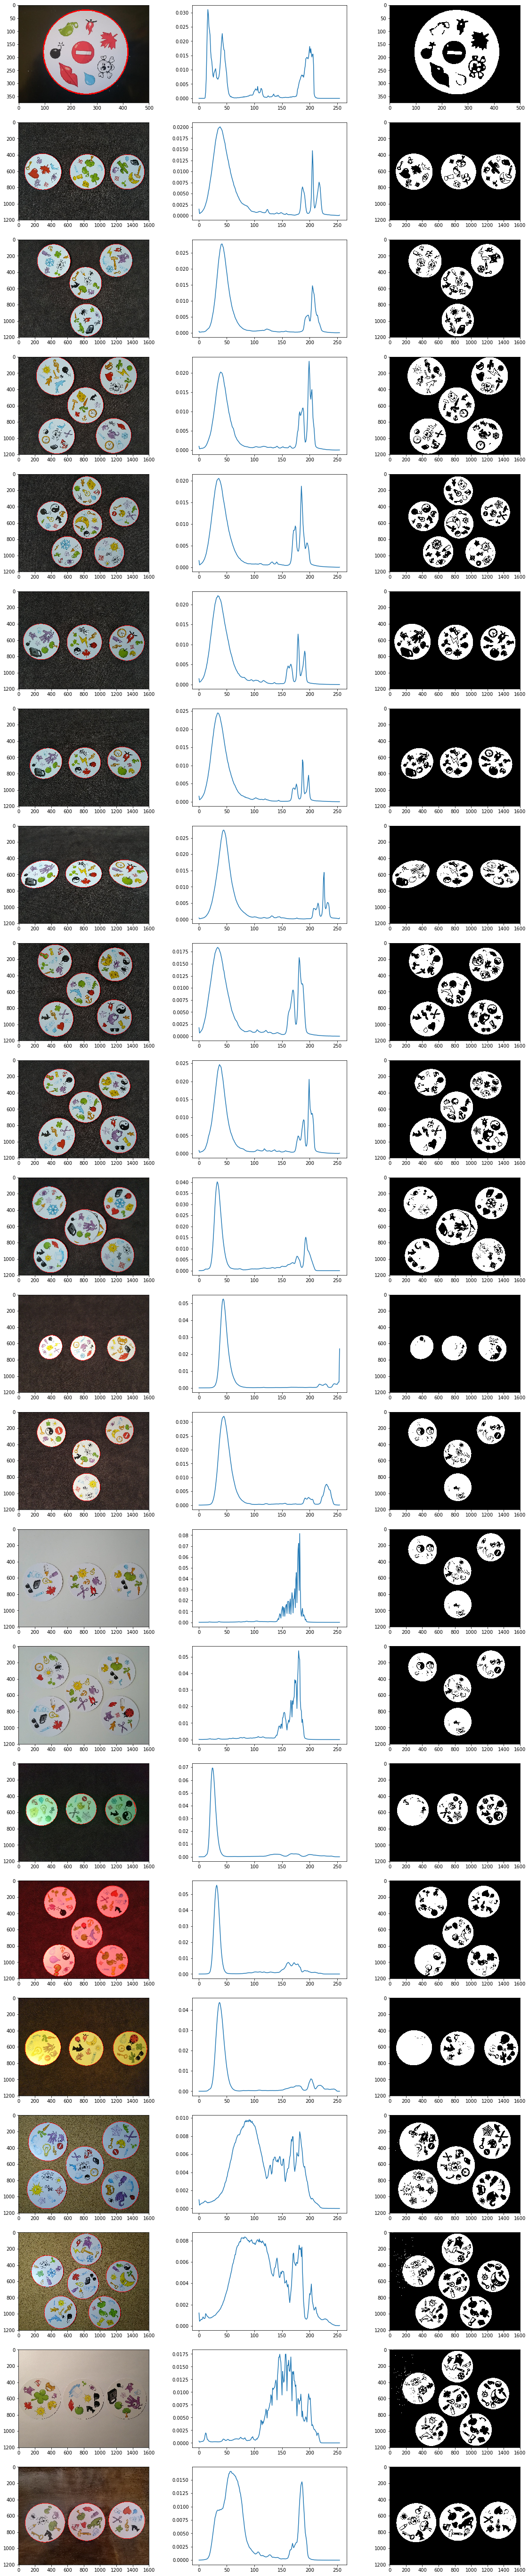

In [47]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures
from skimage import measure
import cv2

def coords(contour, i):
    xmin = int(np.amin(contour[:,0,1]))
    xmax = int(np.amax(contour[:,0,1]))
    ymin = int(np.amin(contour[:,0,0]))
    ymax = int(np.amax(contour[:,0,0]))
    return xmin-i, xmax+i, ymin-i, ymax+i



fig, ax = plt.subplots(22, 3, figsize=(20,100))

for i in range(22):
    filename = "./img/dobble"+'{:02d}'.format(i)+".jpg"
    img_col = cv2.imread(filename)
    img_col = cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB)
    img_gray = cv2.imread(filename, 0)
    print("Processing image ", i)

    histo, x = np.histogram(img_as_ubyte(img_gray), range(0, 256), density=True)
    
    if (np.mean(img_gray) < 150):  #dla wszystkich zdjęć bez białego tła
    
        ret, th1 = cv2.threshold(img_gray, 115, 255, cv2.THRESH_BINARY)
        th1 = cv2.erode(th1,np.ones((3,3),np.uint8),iterations = 3)
        th1 = cv2.dilate(th1, np.ones((3,3),np.uint8), iterations = 2)
        im2, contours, hierarchy = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            xmin, xmax, ymin, ymax = coords(contour, 0)
            if (xmax-xmin > 100 or ymax-ymin > 100):
    #                 cards.append({"pic": img_col[xmin:xmax,ymin:ymax], "IndexInHierarchy": i, "signs": []})
    #                 cardsIndexInHierarchy.append(i)
                cv2.drawContours(img_col, [contour], 0, (255,0,0), 4)
    else:
        print(img_col[0])
        
        
#         im2, contours, hierarchy = cv2.findContours(th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#         for contour in contours:
#             xmin, xmax, ymin, ymax = coords(contour, 0)
#             if (xmax-xmin > 100 or ymax-ymin > 100):
#     #                 cards.append({"pic": img_col[xmin:xmax,ymin:ymax], "IndexInHierarchy": i, "signs": []})
#     #                 cardsIndexInHierarchy.append(i)
#                 cv2.drawContours(img_col, [contour], 0, (255,0,0), 4)
    
    
    ax[i,0].imshow(img_col)
    ax[i,1].plot(histo)
    ax[i,2].imshow(th1, 'gray')
    
    
    print(i, np.std(img_gray), np.mean(img_gray))
    print()
    

    